In [1]:
import pandas as pd 
import numpy as np 
import chardet 
from shapely.geometry import Polygon 
import shapely, geopandas, fiona
import seaborn as sns
from fiona.crs import from_epsg,from_string
from shapely.geometry import Polygon, mapping

In [2]:
path1 = 'LDN-LSOAs.shp' 
losa_df = geopandas.GeoDataFrame.from_file(path1)
losa_df['center_x'] = 0.0
losa_df['center_y'] = 0.0

In [3]:
a = losa_df['geometry'][0]
b = a.centroid.wkt
b[7:22]
b[24:-1]

'181621.1945047779'

In [4]:
losa_df

,lsoa11cd,lsoa11nm,lsoa11nmw,objectid,st_areasha,st_lengths,geometry,center_x,center_y
0,E01000001,City of London 001A,City of London 001A,1,1.333208e+05,2291.846072,"POLYGON ((532105.3302893325 182017.3864794874,...",0.0,0.0
1,E01000002,City of London 001B,City of London 001B,2,2.261913e+05,2433.960112,"POLYGON ((532747.0475768285 181793.0423077808,...",0.0,0.0
2,E01000003,City of London 001C,City of London 001C,3,5.730297e+04,1142.359799,"POLYGON ((532135.3847144214 182204.2750178791,...",0.0,0.0
3,E01000005,City of London 001E,City of London 001E,4,1.907388e+05,2167.868343,"POLYGON ((533808.1704519053 180773.9104895283,...",0.0,0.0
4,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,5,1.441958e+05,1935.510354,"POLYGON ((545122.084155924 184321.0132629346, ...",0.0,0.0
5,E01000007,Barking and Dagenham 015A,Barking and Dagenham 015A,6,1.981348e+05,2824.036914,"POLYGON ((544180.393628164 184706.6513102216, ...",0.0,0.0
6,E01000008,Barking and Dagenham 015B,Barking and Dagenham 015B,7,1.934251e+05,3908.366576,(POLYGON ((543565.8806897739 183957.9780438886...,0.0,0.0
7,E01000009,Barking and Dagenham 016B,Barking and Dagenham 016B,8,1.285915e+05,2065.959114,"POLYGON ((544499.8779171283 184710.4383292422,...",0.0,0.0
8,E01000010,Barking and Dagenham 015C,Barking and Dagenham 015C,9,3.488483e+05,3097.622827,"POLYGON ((544174.0514368266 184367.0737519478,...",0.0,0.0
9,E01000011,Barking and Dagenham 016C,Barking and Dagenham 016C,10,9.029768e+04,1496.030365,"POLYGON ((544523.4412649143 184795.1099610474,...",0.0,0.0


In [5]:
for i in range(len(losa_df)):
    l_temp = losa_df['geometry'][i].centroid.wkt
    losa_df['center_x'][i] = float(l_temp[7:22])
    losa_df['center_y'][i] = float(l_temp[24:-1])

/Users/ziliugao2/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ziliugao2/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [6]:
from shapely import geometry
losa_df['r_1000'] = ''
losa_df['r_3000'] = ''
for i in range(len(losa_df)):
    p1_1 = geometry.Point(losa_df['center_x'][i]+1000,losa_df['center_y'][i])
    p2_1 = geometry.Point(losa_df['center_x'][i],losa_df['center_y'][i]+1000)
    p3_1 = geometry.Point(losa_df['center_x'][i]-1000,losa_df['center_y'][i])
    p4_1 = geometry.Point(losa_df['center_x'][i],losa_df['center_y'][i]-1000)
    pointList_1 = [p1_1, p2_1, p3_1, p4_1, p1_1]
    poly_1 = geometry.Polygon([[p.x, p.y] for p in pointList_1])
    losa_df['r_1000'][i] = poly_1 
    p1_3 = geometry.Point(losa_df['center_x'][i]+3000,losa_df['center_y'][i])
    p2_3 = geometry.Point(losa_df['center_x'][i],losa_df['center_y'][i]+3000)
    p3_3 = geometry.Point(losa_df['center_x'][i]-3000,losa_df['center_y'][i])
    p4_3 = geometry.Point(losa_df['center_x'][i],losa_df['center_y'][i]-3000)
    pointList_3 = [p1_3, p2_3, p3_3, p4_3, p1_3]
    poly_3 = geometry.Polygon([[p.x, p.y] for p in pointList_3])
    losa_df['r_3000'][i] = poly_3

/Users/ziliugao2/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/ziliugao2/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
losa_df

,lsoa11cd,lsoa11nm,lsoa11nmw,objectid,st_areasha,st_lengths,geometry,center_x,center_y,r_1000,r_3000
0,E01000001,City of London 001A,City of London 001A,1,1.333208e+05,2291.846072,"POLYGON ((532105.3302893325 182017.3864794874,...",532151.114410,181621.194505,"POLYGON ((533151.1144096199 181621.1945047779,...","POLYGON ((535151.1144096199 181621.1945047779,..."
1,E01000002,City of London 001B,City of London 001B,2,2.261913e+05,2433.960112,"POLYGON ((532747.0475768285 181793.0423077808,...",532443.588307,181652.015708,"POLYGON ((533443.58830664 181652.0157084507, 5...","POLYGON ((535443.58830664 181652.0157084507, 5..."
2,E01000003,City of London 001C,City of London 001C,3,5.730297e+04,1142.359799,"POLYGON ((532135.3847144214 182204.2750178791,...",532207.300397,182036.242243,"POLYGON ((533207.30039726 182036.2422433496, 5...","POLYGON ((535207.30039726 182036.2422433496, 5..."
3,E01000005,City of London 001E,City of London 001E,4,1.907388e+05,2167.868343,"POLYGON ((533808.1704519053 180773.9104895283,...",533618.818988,181163.259735,"POLYGON ((534618.8189877 181163.2597345951, 53...","POLYGON ((536618.8189877 181163.2597345951, 53..."
4,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,5,1.441958e+05,1935.510354,"POLYGON ((545122.084155924 184321.0132629346, ...",544934.406438,184303.632146,"POLYGON ((545934.40643796 184303.6321460906, 5...","POLYGON ((547934.40643796 184303.6321460906, 5..."
5,E01000007,Barking and Dagenham 015A,Barking and Dagenham 015A,6,1.981348e+05,2824.036914,"POLYGON ((544180.393628164 184706.6513102216, ...",544139.909182,184442.939235,"POLYGON ((545139.90918169 184442.9392345442, 5...","POLYGON ((547139.90918169 184442.9392345442, 5..."
6,E01000008,Barking and Dagenham 015B,Barking and Dagenham 015B,7,1.934251e+05,3908.366576,(POLYGON ((543565.8806897739 183957.9780438886...,543630.654042,184392.725582,"POLYGON ((544630.65404181 184392.7255817492, 5...","POLYGON ((546630.65404181 184392.7255817492, 5..."
7,E01000009,Barking and Dagenham 016B,Barking and Dagenham 016B,8,1.285915e+05,2065.959114,"POLYGON ((544499.8779171283 184710.4383292422,...",544601.180234,184464.138155,"POLYGON ((545601.18023351 184464.1381549689, 5...","POLYGON ((547601.18023351 184464.1381549689, 5..."
8,E01000010,Barking and Dagenham 015C,Barking and Dagenham 015C,9,3.488483e+05,3097.622827,"POLYGON ((544174.0514368266 184367.0737519478,...",544231.208639,184056.155476,"POLYGON ((545231.2086394 184056.1554761495, 54...","POLYGON ((547231.2086394 184056.1554761495, 54..."
9,E01000011,Barking and Dagenham 016C,Barking and Dagenham 016C,10,9.029768e+04,1496.030365,"POLYGON ((544523.4412649143 184795.1099610474,...",544382.749192,184744.636264,"POLYGON ((545382.7491923301 184744.6362640459,...","POLYGON ((547382.7491923301 184744.6362640459,..."


In [8]:
path2 = 'TQ_GreenspaceSite.shp' 
green_df = geopandas.GeoDataFrame.from_file(path2)

In [9]:
green_df

,id,function,distName1,distName2,distName3,distName4,geometry
0,7367CB01-2920-4A5F-E053-A03BA40AD968,Playing Field,None,None,None,None,"POLYGON Z ((533451.48 193747.28 0, 533441.6 19..."
1,7367CADD-68D3-4A5F-E053-A03BA40AD968,Cemetery,Edmonton Cemetery,None,None,None,"POLYGON Z ((533072.13 194102.49 0, 533085.4 19..."
2,7367CB01-1DA3-4A5F-E053-A03BA40AD968,Allotments Or Community Growing Spaces,None,None,None,None,"POLYGON Z ((531781.25 193811.42 0, 531778.15 1..."
3,7367CB01-1DE5-4A5F-E053-A03BA40AD968,Allotments Or Community Growing Spaces,None,None,None,None,"POLYGON Z ((531903.9 193797.35 0, 531881.02 19..."
4,7367CAC0-17E8-4A5F-E053-A03BA40AD968,Allotments Or Community Growing Spaces,None,None,None,None,"POLYGON Z ((531929.4 193833.2 0, 531927.4 1938..."
5,7367CC39-F38C-4A5F-E053-A03BA40AD968,Play Space,None,None,None,None,"POLYGON Z ((533044.36 194003.06 0, 533051.15 1..."
6,7367CB01-28CF-4A5F-E053-A03BA40AD968,Other Sports Facility,None,None,None,None,"POLYGON Z ((533044.36 194003.06 0, 533051.15 1..."
7,7367CB01-28E4-4A5F-E053-A03BA40AD968,Playing Field,None,None,None,None,"POLYGON Z ((533144.27 194066.95 0, 533145.15 1..."
8,7367CB01-28E6-4A5F-E053-A03BA40AD968,Bowling Green,None,None,None,None,"POLYGON Z ((533254.96 194080.35 0, 533244.4 19..."
9,7367CABA-F676-4A5F-E053-A03BA40AD968,Public Park Or Garden,None,None,None,None,"POLYGON Z ((533145.15 194071.4 0, 533142.7 194..."


In [10]:
losa_df

,lsoa11cd,lsoa11nm,lsoa11nmw,objectid,st_areasha,st_lengths,geometry,center_x,center_y,r_1000,r_3000
0,E01000001,City of London 001A,City of London 001A,1,1.333208e+05,2291.846072,"POLYGON ((532105.3302893325 182017.3864794874,...",532151.114410,181621.194505,"POLYGON ((533151.1144096199 181621.1945047779,...","POLYGON ((535151.1144096199 181621.1945047779,..."
1,E01000002,City of London 001B,City of London 001B,2,2.261913e+05,2433.960112,"POLYGON ((532747.0475768285 181793.0423077808,...",532443.588307,181652.015708,"POLYGON ((533443.58830664 181652.0157084507, 5...","POLYGON ((535443.58830664 181652.0157084507, 5..."
2,E01000003,City of London 001C,City of London 001C,3,5.730297e+04,1142.359799,"POLYGON ((532135.3847144214 182204.2750178791,...",532207.300397,182036.242243,"POLYGON ((533207.30039726 182036.2422433496, 5...","POLYGON ((535207.30039726 182036.2422433496, 5..."
3,E01000005,City of London 001E,City of London 001E,4,1.907388e+05,2167.868343,"POLYGON ((533808.1704519053 180773.9104895283,...",533618.818988,181163.259735,"POLYGON ((534618.8189877 181163.2597345951, 53...","POLYGON ((536618.8189877 181163.2597345951, 53..."
4,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,5,1.441958e+05,1935.510354,"POLYGON ((545122.084155924 184321.0132629346, ...",544934.406438,184303.632146,"POLYGON ((545934.40643796 184303.6321460906, 5...","POLYGON ((547934.40643796 184303.6321460906, 5..."
5,E01000007,Barking and Dagenham 015A,Barking and Dagenham 015A,6,1.981348e+05,2824.036914,"POLYGON ((544180.393628164 184706.6513102216, ...",544139.909182,184442.939235,"POLYGON ((545139.90918169 184442.9392345442, 5...","POLYGON ((547139.90918169 184442.9392345442, 5..."
6,E01000008,Barking and Dagenham 015B,Barking and Dagenham 015B,7,1.934251e+05,3908.366576,(POLYGON ((543565.8806897739 183957.9780438886...,543630.654042,184392.725582,"POLYGON ((544630.65404181 184392.7255817492, 5...","POLYGON ((546630.65404181 184392.7255817492, 5..."
7,E01000009,Barking and Dagenham 016B,Barking and Dagenham 016B,8,1.285915e+05,2065.959114,"POLYGON ((544499.8779171283 184710.4383292422,...",544601.180234,184464.138155,"POLYGON ((545601.18023351 184464.1381549689, 5...","POLYGON ((547601.18023351 184464.1381549689, 5..."
8,E01000010,Barking and Dagenham 015C,Barking and Dagenham 015C,9,3.488483e+05,3097.622827,"POLYGON ((544174.0514368266 184367.0737519478,...",544231.208639,184056.155476,"POLYGON ((545231.2086394 184056.1554761495, 54...","POLYGON ((547231.2086394 184056.1554761495, 54..."
9,E01000011,Barking and Dagenham 016C,Barking and Dagenham 016C,10,9.029768e+04,1496.030365,"POLYGON ((544523.4412649143 184795.1099610474,...",544382.749192,184744.636264,"POLYGON ((545382.7491923301 184744.6362640459,...","POLYGON ((547382.7491923301 184744.6362640459,..."


In [11]:
for i in range(len(losa_df)):
    losa_df.loc[i, 'area_1'] = sum(green_df['geometry'].apply(lambda x:losa_df.loc[i, 'r_1000'].intersection(x).area))
    losa_df.loc[i, 'area_3'] = sum(green_df['geometry'].apply(lambda x:losa_df.loc[i, 'r_3000'].intersection(x).area))
    if i%10 ==0:
        print(i)
losa_df

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
2

,lsoa11cd,lsoa11nm,lsoa11nmw,objectid,st_areasha,st_lengths,geometry,center_x,center_y,r_1000,r_3000,area_1,area_3
0,E01000001,City of London 001A,City of London 001A,1,1.333208e+05,2291.846072,"POLYGON ((532105.3302893325 182017.3864794874,...",532151.114410,181621.194505,"POLYGON ((533151.1144096199 181621.1945047779,...","POLYGON ((535151.1144096199 181621.1945047779,...",69253.646918,7.913212e+05
1,E01000002,City of London 001B,City of London 001B,2,2.261913e+05,2433.960112,"POLYGON ((532747.0475768285 181793.0423077808,...",532443.588307,181652.015708,"POLYGON ((533443.58830664 181652.0157084507, 5...","POLYGON ((535443.58830664 181652.0157084507, 5...",79299.133078,8.393802e+05
2,E01000003,City of London 001C,City of London 001C,3,5.730297e+04,1142.359799,"POLYGON ((532135.3847144214 182204.2750178791,...",532207.300397,182036.242243,"POLYGON ((533207.30039726 182036.2422433496, 5...","POLYGON ((535207.30039726 182036.2422433496, 5...",89912.781684,8.375224e+05
3,E01000005,City of London 001E,City of London 001E,4,1.907388e+05,2167.868343,"POLYGON ((533808.1704519053 180773.9104895283,...",533618.818988,181163.259735,"POLYGON ((534618.8189877 181163.2597345951, 53...","POLYGON ((536618.8189877 181163.2597345951, 53...",36111.399815,1.029535e+06
4,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,5,1.441958e+05,1935.510354,"POLYGON ((545122.084155924 184321.0132629346, ...",544934.406438,184303.632146,"POLYGON ((545934.40643796 184303.6321460906, 5...","POLYGON ((547934.40643796 184303.6321460906, 5...",241827.600209,1.916895e+06
5,E01000007,Barking and Dagenham 015A,Barking and Dagenham 015A,6,1.981348e+05,2824.036914,"POLYGON ((544180.393628164 184706.6513102216, ...",544139.909182,184442.939235,"POLYGON ((545139.90918169 184442.9392345442, 5...","POLYGON ((547139.90918169 184442.9392345442, 5...",183351.519985,1.822447e+06
6,E01000008,Barking and Dagenham 015B,Barking and Dagenham 015B,7,1.934251e+05,3908.366576,(POLYGON ((543565.8806897739 183957.9780438886...,543630.654042,184392.725582,"POLYGON ((544630.65404181 184392.7255817492, 5...","POLYGON ((546630.65404181 184392.7255817492, 5...",112370.967578,1.868279e+06
7,E01000009,Barking and Dagenham 016B,Barking and Dagenham 016B,8,1.285915e+05,2065.959114,"POLYGON ((544499.8779171283 184710.4383292422,...",544601.180234,184464.138155,"POLYGON ((545601.18023351 184464.1381549689, 5...","POLYGON ((547601.18023351 184464.1381549689, 5...",296747.364121,1.960218e+06
8,E01000010,Barking and Dagenham 015C,Barking and Dagenham 015C,9,3.488483e+05,3097.622827,"POLYGON ((544174.0514368266 184367.0737519478,...",544231.208639,184056.155476,"POLYGON ((545231.2086394 184056.1554761495, 54...","POLYGON ((547231.2086394 184056.1554761495, 54...",90329.970228,1.704673e+06
9,E01000011,Barking and Dagenham 016C,Barking and Dagenham 016C,10,9.029768e+04,1496.030365,"POLYGON ((544523.4412649143 184795.1099610474,...",544382.749192,184744.636264,"POLYGON ((545382.7491923301 184744.6362640459,...","POLYGON ((547382.7491923301 184744.6362640459,...",362046.379457,2.001731e+06


In [12]:
losa_df.to_csv('out.csv')

In [13]:
losa_df

,lsoa11cd,lsoa11nm,lsoa11nmw,objectid,st_areasha,st_lengths,geometry,center_x,center_y,r_1000,r_3000,area_1,area_3
0,E01000001,City of London 001A,City of London 001A,1,1.333208e+05,2291.846072,"POLYGON ((532105.3302893325 182017.3864794874,...",532151.114410,181621.194505,"POLYGON ((533151.1144096199 181621.1945047779,...","POLYGON ((535151.1144096199 181621.1945047779,...",69253.646918,7.913212e+05
1,E01000002,City of London 001B,City of London 001B,2,2.261913e+05,2433.960112,"POLYGON ((532747.0475768285 181793.0423077808,...",532443.588307,181652.015708,"POLYGON ((533443.58830664 181652.0157084507, 5...","POLYGON ((535443.58830664 181652.0157084507, 5...",79299.133078,8.393802e+05
2,E01000003,City of London 001C,City of London 001C,3,5.730297e+04,1142.359799,"POLYGON ((532135.3847144214 182204.2750178791,...",532207.300397,182036.242243,"POLYGON ((533207.30039726 182036.2422433496, 5...","POLYGON ((535207.30039726 182036.2422433496, 5...",89912.781684,8.375224e+05
3,E01000005,City of London 001E,City of London 001E,4,1.907388e+05,2167.868343,"POLYGON ((533808.1704519053 180773.9104895283,...",533618.818988,181163.259735,"POLYGON ((534618.8189877 181163.2597345951, 53...","POLYGON ((536618.8189877 181163.2597345951, 53...",36111.399815,1.029535e+06
4,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,5,1.441958e+05,1935.510354,"POLYGON ((545122.084155924 184321.0132629346, ...",544934.406438,184303.632146,"POLYGON ((545934.40643796 184303.6321460906, 5...","POLYGON ((547934.40643796 184303.6321460906, 5...",241827.600209,1.916895e+06
5,E01000007,Barking and Dagenham 015A,Barking and Dagenham 015A,6,1.981348e+05,2824.036914,"POLYGON ((544180.393628164 184706.6513102216, ...",544139.909182,184442.939235,"POLYGON ((545139.90918169 184442.9392345442, 5...","POLYGON ((547139.90918169 184442.9392345442, 5...",183351.519985,1.822447e+06
6,E01000008,Barking and Dagenham 015B,Barking and Dagenham 015B,7,1.934251e+05,3908.366576,(POLYGON ((543565.8806897739 183957.9780438886...,543630.654042,184392.725582,"POLYGON ((544630.65404181 184392.7255817492, 5...","POLYGON ((546630.65404181 184392.7255817492, 5...",112370.967578,1.868279e+06
7,E01000009,Barking and Dagenham 016B,Barking and Dagenham 016B,8,1.285915e+05,2065.959114,"POLYGON ((544499.8779171283 184710.4383292422,...",544601.180234,184464.138155,"POLYGON ((545601.18023351 184464.1381549689, 5...","POLYGON ((547601.18023351 184464.1381549689, 5...",296747.364121,1.960218e+06
8,E01000010,Barking and Dagenham 015C,Barking and Dagenham 015C,9,3.488483e+05,3097.622827,"POLYGON ((544174.0514368266 184367.0737519478,...",544231.208639,184056.155476,"POLYGON ((545231.2086394 184056.1554761495, 54...","POLYGON ((547231.2086394 184056.1554761495, 54...",90329.970228,1.704673e+06
9,E01000011,Barking and Dagenham 016C,Barking and Dagenham 016C,10,9.029768e+04,1496.030365,"POLYGON ((544523.4412649143 184795.1099610474,...",544382.749192,184744.636264,"POLYGON ((545382.7491923301 184744.6362640459,...","POLYGON ((547382.7491923301 184744.6362640459,...",362046.379457,2.001731e+06


In [2]:
lsoa_df = geopandas.read_file('out.csv')

In [3]:
lsoa_df

,field_1,lsoa11cd,lsoa11nm,lsoa11nmw,objectid,st_areasha,st_lengths,geometry,center_x,center_y,r_1000,r_3000,area_1,area_3,geometry
0,0,E01000001,City of London 001A,City of London 001A,1,133320.768872,2291.846072,"POLYGON ((532105.3302893325 182017.3864794874,...",532151.11440962,181621.1945047779,"POLYGON ((533151.1144096199 181621.1945047779,...","POLYGON ((535151.1144096199 181621.1945047779,...",69253.6469179724,791321.2089197687,"POLYGON ((532105.3302893325 182017.3864794874,..."
1,1,E01000002,City of London 001B,City of London 001B,2,226191.27299,2433.960112,"POLYGON ((532747.0475768285 181793.0423077808,...",532443.58830664,181652.0157084507,"POLYGON ((533443.58830664 181652.0157084507, 5...","POLYGON ((535443.58830664 181652.0157084507, 5...",79299.13307843421,839380.2028346373,"POLYGON ((532747.0475768285 181793.0423077808,..."
2,2,E01000003,City of London 001C,City of London 001C,3,57302.966538,1142.359799,"POLYGON ((532135.3847144214 182204.2750178791,...",532207.30039726,182036.2422433496,"POLYGON ((533207.30039726 182036.2422433496, 5...","POLYGON ((535207.30039726 182036.2422433496, 5...",89912.78168414712,837522.3535955958,"POLYGON ((532135.3847144214 182204.2750178791,..."
3,3,E01000005,City of London 001E,City of London 001E,4,190738.760504,2167.868343,"POLYGON ((533808.1704519053 180773.9104895283,...",533618.8189877,181163.2597345951,"POLYGON ((534618.8189877 181163.2597345951, 53...","POLYGON ((536618.8189877 181163.2597345951, 53...",36111.399814624965,1029535.3324494705,"POLYGON ((533808.1704519053 180773.9104895283,..."
4,4,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,5,144195.846857,1935.510354,"POLYGON ((545122.084155924 184321.0132629346, ...",544934.40643796,184303.6321460906,"POLYGON ((545934.40643796 184303.6321460906, 5...","POLYGON ((547934.40643796 184303.6321460906, 5...",241827.60020949526,1916894.824463506,"POLYGON ((545122.084155924 184321.0132629346, ..."
5,5,E01000007,Barking and Dagenham 015A,Barking and Dagenham 015A,6,198134.809244,2824.036914,"POLYGON ((544180.393628164 184706.6513102216, ...",544139.90918169,184442.9392345442,"POLYGON ((545139.90918169 184442.9392345442, 5...","POLYGON ((547139.90918169 184442.9392345442, 5...",183351.5199848773,1822446.958919966,"POLYGON ((544180.393628164 184706.6513102216, ..."
6,6,E01000008,Barking and Dagenham 015B,Barking and Dagenham 015B,7,193425.098879,3908.366576,MULTIPOLYGON (((543565.8806897739 183957.97804...,543630.65404181,184392.7255817492,"POLYGON ((544630.65404181 184392.7255817492, 5...","POLYGON ((546630.65404181 184392.7255817492, 5...",112370.96757807944,1868278.591627825,MULTIPOLYGON (((543565.8806897739 183957.97804...
7,7,E01000009,Barking and Dagenham 016B,Barking and Dagenham 016B,8,128591.526205,2065.959114,"POLYGON ((544499.8779171283 184710.4383292422,...",544601.18023351,184464.1381549689,"POLYGON ((545601.18023351 184464.1381549689, 5...","POLYGON ((547601.18023351 184464.1381549689, 5...",296747.36412081146,1960217.9607237217,"POLYGON ((544499.8779171283 184710.4383292422,..."
8,8,E01000010,Barking and Dagenham 015C,Barking and Dagenham 015C,9,348848.342174,3097.622827,"POLYGON ((544174.0514368266 184367.0737519478,...",544231.2086394,184056.1554761495,"POLYGON ((545231.2086394 184056.1554761495, 54...","POLYGON ((547231.2086394 184056.1554761495, 54...",90329.9702283665,1704673.076842478,"POLYGON ((544174.0514368266 184367.0737519478,..."
9,9,E01000011,Barking and Dagenham 016C,Barking and Dagenham 016C,10,90297.679809,1496.030365,"POLYGON ((544523.4412649143 184795.1099610474,...",544382.74919233,184744.6362640459,"POLYGON ((545382.7491923301 184744.6362640459,...","POLYGON ((547382.7491923301 184744.6362640459,...",362046.379456768,2001730.8178093752,"POLYGON ((544523.4412649143 184795.1099610474,..."


In [8]:
lsoa_df = lsoa_df.loc[:,~lsoa_df.columns.duplicated()]
lsoa_df = lsoa_df.drop(['r_1000','r_3000'],axis=1)

In [9]:
lsoa_df

,field_1,lsoa11cd,lsoa11nm,lsoa11nmw,objectid,st_areasha,st_lengths,geometry,center_x,center_y,area_1,area_3
0,0,E01000001,City of London 001A,City of London 001A,1,133320.768872,2291.846072,"POLYGON ((532105.3302893325 182017.3864794874,...",532151.11440962,181621.1945047779,69253.6469179724,791321.2089197687
1,1,E01000002,City of London 001B,City of London 001B,2,226191.27299,2433.960112,"POLYGON ((532747.0475768285 181793.0423077808,...",532443.58830664,181652.0157084507,79299.13307843421,839380.2028346373
2,2,E01000003,City of London 001C,City of London 001C,3,57302.966538,1142.359799,"POLYGON ((532135.3847144214 182204.2750178791,...",532207.30039726,182036.2422433496,89912.78168414712,837522.3535955958
3,3,E01000005,City of London 001E,City of London 001E,4,190738.760504,2167.868343,"POLYGON ((533808.1704519053 180773.9104895283,...",533618.8189877,181163.2597345951,36111.399814624965,1029535.3324494705
4,4,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,5,144195.846857,1935.510354,"POLYGON ((545122.084155924 184321.0132629346, ...",544934.40643796,184303.6321460906,241827.60020949526,1916894.824463506
5,5,E01000007,Barking and Dagenham 015A,Barking and Dagenham 015A,6,198134.809244,2824.036914,"POLYGON ((544180.393628164 184706.6513102216, ...",544139.90918169,184442.9392345442,183351.5199848773,1822446.958919966
6,6,E01000008,Barking and Dagenham 015B,Barking and Dagenham 015B,7,193425.098879,3908.366576,MULTIPOLYGON (((543565.8806897739 183957.97804...,543630.65404181,184392.7255817492,112370.96757807944,1868278.591627825
7,7,E01000009,Barking and Dagenham 016B,Barking and Dagenham 016B,8,128591.526205,2065.959114,"POLYGON ((544499.8779171283 184710.4383292422,...",544601.18023351,184464.1381549689,296747.36412081146,1960217.9607237217
8,8,E01000010,Barking and Dagenham 015C,Barking and Dagenham 015C,9,348848.342174,3097.622827,"POLYGON ((544174.0514368266 184367.0737519478,...",544231.2086394,184056.1554761495,90329.9702283665,1704673.076842478
9,9,E01000011,Barking and Dagenham 016C,Barking and Dagenham 016C,10,90297.679809,1496.030365,"POLYGON ((544523.4412649143 184795.1099610474,...",544382.74919233,184744.6362640459,362046.379456768,2001730.8178093752


In [10]:
import matplotlib.pyplot as plt

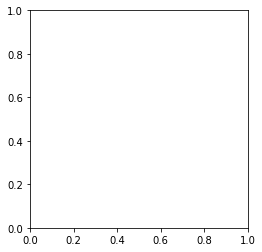

In [23]:
lsoa_df.plot()

In [25]:
path1 = 'LDN-LSOAs.shp' 
df = geopandas.GeoDataFrame.from_file(path1)

In [29]:
df['area_1'] = lsoa_df['area_1']
df['area_3'] = lsoa_df['area_3']

Text(0.5, 1, 'Green Area within 1km range')

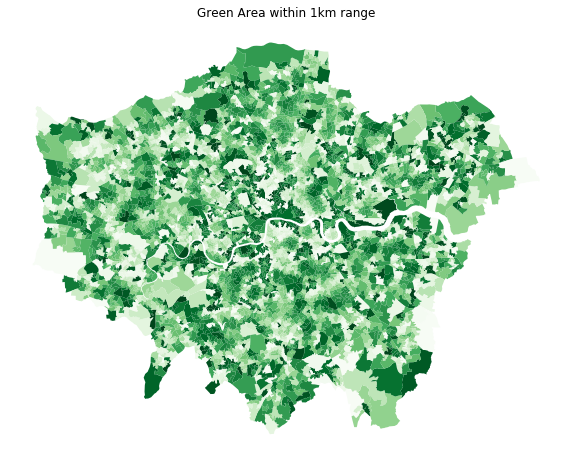

In [45]:
df.plot(figsize=(10,10),column='area_1',cmap='Greens')
plt.axis('off')
plt.title('Green Area within 1km range')

Text(0.5, 1, 'Green Area within 3km range')

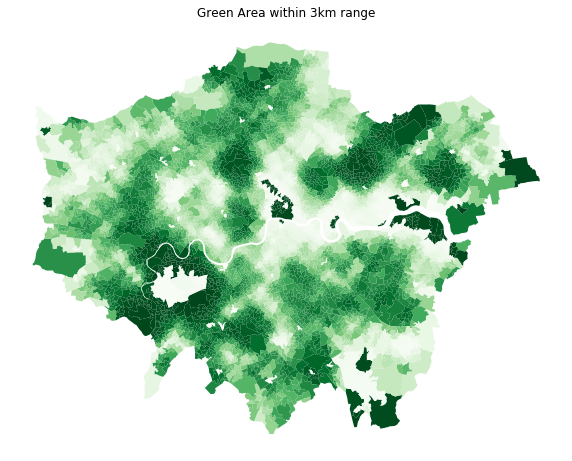

In [44]:
df.plot(figsize=(10,10),column='area_3',cmap='Greens')
plt.axis('off')
plt.title('Green Area within 3km range')